In [457]:
# Installing SQL in Pandas
!pip install pandasql

In [458]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from pathlib import Path
from google.colab import drive
import time
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandasql as psql

In [459]:
# Import and read healthcare_data.csv
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/healthcare_dataset.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,75763,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,2023-11-04,2024-08-15,Show
1,84945,52.0,Male,Uninsured,False,False,Employed,College,True,NaN,Rural,2023-10-28,2024-07-11,No-Show
2,88559,8.0,Male,Medicare,True,NaN,NaN,Advanced Degree,True,27.277654,Rural,2023-02-12,2024-10-26,Show
3,72217,5.0,Other,Medicare,False,True,Student,College,True,44.618708,NaN,2023-01-30,2024-01-31,Show
4,44071,76.0,Male,Uninsured,True,False,Employed,Advanced Degree,False,12.568497,Urban,2023-11-27,2024-03-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16333,48.0,Female,NaN,True,True,Student,NaN,True,26.576418,Urban,2023-11-24,2024-03-16,No-Show
49996,11153,5.0,Other,Medicaid,True,True,Student,NaN,False,20.674054,Suburban,2023-11-29,2023-12-05,No-Show
49997,15966,92.0,Female,Uninsured,False,True,Student,NaN,True,34.457721,Suburban,2022-11-20,2024-07-27,NaN
49998,41988,53.0,Male,Medicaid,False,False,Employed,College,False,21.190068,Suburban,2023-05-02,2023-12-19,No-Show


In [460]:
# Get a brief summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              50000 non-null  int64  
 1   Age                     44924 non-null  float64
 2   Gender                  45094 non-null  object 
 3   Insurance_Type          45009 non-null  object 
 4   Chronic_Disease         45033 non-null  object 
 5   Mental_Health_Status    44962 non-null  object 
 6   Employment_Status       44937 non-null  object 
 7   Education_Level         33744 non-null  object 
 8   Transportation_Access   45013 non-null  object 
 9   Distance_from_Facility  44983 non-null  float64
 10  Area_Type               45016 non-null  object 
 11  Booking_Date            50000 non-null  object 
 12  Appointment_Date        50000 non-null  object 
 13  Appointment_Outcome     45042 non-null  object 
dtypes: float64(2), int64(1), object(11)
me

In [461]:
# Removing rows with null data
df = df.dropna()
df

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,75763,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,2023-11-04,2024-08-15,Show
10,94722,76.0,Female,Medicare,True,True,Student,Advanced Degree,False,21.246094,Suburban,2023-02-09,2024-04-06,Show
11,18645,18.0,Male,Private,False,False,Unemployed,Advanced Degree,True,35.827139,Urban,2023-02-14,2024-09-14,Show
13,21727,6.0,Male,Private,True,False,Retired,Advanced Degree,True,43.314191,Suburban,2023-12-06,2024-09-12,No-Show
20,46269,100.0,Male,Medicaid,False,True,Retired,College,True,30.057164,Urban,2023-11-03,2024-05-05,Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,51041,50.0,Male,Medicare,True,True,Retired,Advanced Degree,False,2.219225,Urban,2022-12-23,2024-08-27,No-Show
49990,75773,75.0,Female,Medicare,False,True,Employed,Advanced Degree,False,11.718303,Urban,2023-09-01,2023-11-24,Show
49991,11154,8.0,Female,Medicare,True,False,Student,Advanced Degree,False,16.827135,Suburban,2023-03-21,2024-10-16,No-Show
49993,91361,57.0,Female,Private,True,False,Student,High School,True,28.410940,Suburban,2024-01-26,2024-03-01,Show


In [462]:
# Rounding "Age" column to whole number
df['Age'] = df['Age'].astype(int)
df

<ipython-input-462-05a3f53f484e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,75763,93,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,2023-11-04,2024-08-15,Show
10,94722,76,Female,Medicare,True,True,Student,Advanced Degree,False,21.246094,Suburban,2023-02-09,2024-04-06,Show
11,18645,18,Male,Private,False,False,Unemployed,Advanced Degree,True,35.827139,Urban,2023-02-14,2024-09-14,Show
13,21727,6,Male,Private,True,False,Retired,Advanced Degree,True,43.314191,Suburban,2023-12-06,2024-09-12,No-Show
20,46269,100,Male,Medicaid,False,True,Retired,College,True,30.057164,Urban,2023-11-03,2024-05-05,Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,51041,50,Male,Medicare,True,True,Retired,Advanced Degree,False,2.219225,Urban,2022-12-23,2024-08-27,No-Show
49990,75773,75,Female,Medicare,False,True,Employed,Advanced Degree,False,11.718303,Urban,2023-09-01,2023-11-24,Show
49991,11154,8,Female,Medicare,True,False,Student,Advanced Degree,False,16.827135,Suburban,2023-03-21,2024-10-16,No-Show
49993,91361,57,Female,Private,True,False,Student,High School,True,28.410940,Suburban,2024-01-26,2024-03-01,Show


In [463]:
# Filter "Age" where it is greater than or equal to 18
query = "SELECT * FROM df WHERE Age >= 18"
filtered_df = psql.sqldf(query)
filtered_df

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,75763,93,Male,Medicare,0,1,Student,Advanced Degree,1,37.785038,Suburban,2023-11-04,2024-08-15,Show
1,94722,76,Female,Medicare,1,1,Student,Advanced Degree,0,21.246094,Suburban,2023-02-09,2024-04-06,Show
2,18645,18,Male,Private,0,0,Unemployed,Advanced Degree,1,35.827139,Urban,2023-02-14,2024-09-14,Show
3,46269,100,Male,Medicaid,0,1,Retired,College,1,30.057164,Urban,2023-11-03,2024-05-05,Show
4,44212,59,Male,Medicare,1,1,Unemployed,College,0,25.300623,Suburban,2023-03-30,2024-01-04,No-Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,66630,41,Other,Medicaid,1,0,Retired,High School,1,22.531796,Urban,2023-11-12,2024-03-09,Show
9688,51041,50,Male,Medicare,1,1,Retired,Advanced Degree,0,2.219225,Urban,2022-12-23,2024-08-27,No-Show
9689,75773,75,Female,Medicare,0,1,Employed,Advanced Degree,0,11.718303,Urban,2023-09-01,2023-11-24,Show
9690,91361,57,Female,Private,1,0,Student,High School,1,28.410940,Suburban,2024-01-26,2024-03-01,Show


In [464]:
# Rounding "Distance_From_Facility" to one decimal place
filtered_df['Distance_from_Facility'] = filtered_df['Distance_from_Facility'].round(1)
filtered_df

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,75763,93,Male,Medicare,0,1,Student,Advanced Degree,1,37.8,Suburban,2023-11-04,2024-08-15,Show
1,94722,76,Female,Medicare,1,1,Student,Advanced Degree,0,21.2,Suburban,2023-02-09,2024-04-06,Show
2,18645,18,Male,Private,0,0,Unemployed,Advanced Degree,1,35.8,Urban,2023-02-14,2024-09-14,Show
3,46269,100,Male,Medicaid,0,1,Retired,College,1,30.1,Urban,2023-11-03,2024-05-05,Show
4,44212,59,Male,Medicare,1,1,Unemployed,College,0,25.3,Suburban,2023-03-30,2024-01-04,No-Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,66630,41,Other,Medicaid,1,0,Retired,High School,1,22.5,Urban,2023-11-12,2024-03-09,Show
9688,51041,50,Male,Medicare,1,1,Retired,Advanced Degree,0,2.2,Urban,2022-12-23,2024-08-27,No-Show
9689,75773,75,Female,Medicare,0,1,Employed,Advanced Degree,0,11.7,Urban,2023-09-01,2023-11-24,Show
9690,91361,57,Female,Private,1,0,Student,High School,1,28.4,Suburban,2024-01-26,2024-03-01,Show


In [465]:
# Saving cleaned .csv file
model_path = '/content/gdrive/My Drive/cleaned_healthcare_dataset.csv'
filtered_df.to_csv(model_path, index=False)

In [466]:
# Seperating numeric and non-numeric columns
numeric = filtered_df.select_dtypes(include=['int64', 'float64'])
non_numeric = filtered_df.select_dtypes(include=['object'])

In [467]:
# Check for columns with low variance
low_variance = filtered_df[numeric.columns].var() < 0.01
low_variance

Patient_ID                False
Age                       False
Chronic_Disease           False
Mental_Health_Status      False
Transportation_Access     False
Distance_from_Facility    False
dtype: bool

In [468]:
# Check for high correlation among numeric features
high_correlation = filtered_df[numeric.columns].corr()
high_correlation

,Patient_ID,Age,Chronic_Disease,Mental_Health_Status,Transportation_Access,Distance_from_Facility
Patient_ID,1.000000,-0.002902,0.009818,0.009890,0.013447,-0.010568
Age,-0.002902,1.000000,-0.026673,-0.015574,-0.005443,-0.011956
Chronic_Disease,0.009818,-0.026673,1.000000,-0.002692,-0.001495,-0.001171
Mental_Health_Status,0.009890,-0.015574,-0.002692,1.000000,0.018050,0.001861
Transportation_Access,0.013447,-0.005443,-0.001495,0.018050,1.000000,0.023218
Distance_from_Facility,-0.010568,-0.011956,-0.001171,0.001861,0.023218,1.000000


In [469]:
# Dropping the column with high correlation
df = filtered_df.drop(columns=['Patient_ID'])
df

,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,93,Male,Medicare,0,1,Student,Advanced Degree,1,37.8,Suburban,2023-11-04,2024-08-15,Show
1,76,Female,Medicare,1,1,Student,Advanced Degree,0,21.2,Suburban,2023-02-09,2024-04-06,Show
2,18,Male,Private,0,0,Unemployed,Advanced Degree,1,35.8,Urban,2023-02-14,2024-09-14,Show
3,100,Male,Medicaid,0,1,Retired,College,1,30.1,Urban,2023-11-03,2024-05-05,Show
4,59,Male,Medicare,1,1,Unemployed,College,0,25.3,Suburban,2023-03-30,2024-01-04,No-Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,41,Other,Medicaid,1,0,Retired,High School,1,22.5,Urban,2023-11-12,2024-03-09,Show
9688,50,Male,Medicare,1,1,Retired,Advanced Degree,0,2.2,Urban,2022-12-23,2024-08-27,No-Show
9689,75,Female,Medicare,0,1,Employed,Advanced Degree,0,11.7,Urban,2023-09-01,2023-11-24,Show
9690,57,Female,Private,1,0,Student,High School,1,28.4,Suburban,2024-01-26,2024-03-01,Show


In [470]:
# Determine the number of unique values in each column
unique_values = df.nunique()
unique_values

Age                        83
Gender                      3
Insurance_Type              4
Chronic_Disease             2
Mental_Health_Status        2
Employment_Status           4
Education_Level             3
Transportation_Access       2
Distance_from_Facility    501
Area_Type                   3
Booking_Date              701
Appointment_Date          365
Appointment_Outcome         2
dtype: int64

In [471]:
# Convert "Booking_Date" to datetime
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'], errors='coerce')
df['Booking_Date'] = df['Booking_Date'].dt.date
df

,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,93,Male,Medicare,0,1,Student,Advanced Degree,1,37.8,Suburban,2023-11-04,2024-08-15,Show
1,76,Female,Medicare,1,1,Student,Advanced Degree,0,21.2,Suburban,2023-02-09,2024-04-06,Show
2,18,Male,Private,0,0,Unemployed,Advanced Degree,1,35.8,Urban,2023-02-14,2024-09-14,Show
3,100,Male,Medicaid,0,1,Retired,College,1,30.1,Urban,2023-11-03,2024-05-05,Show
4,59,Male,Medicare,1,1,Unemployed,College,0,25.3,Suburban,2023-03-30,2024-01-04,No-Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,41,Other,Medicaid,1,0,Retired,High School,1,22.5,Urban,2023-11-12,2024-03-09,Show
9688,50,Male,Medicare,1,1,Retired,Advanced Degree,0,2.2,Urban,2022-12-23,2024-08-27,No-Show
9689,75,Female,Medicare,0,1,Employed,Advanced Degree,0,11.7,Urban,2023-09-01,2023-11-24,Show
9690,57,Female,Private,1,0,Student,High School,1,28.4,Suburban,2024-01-26,2024-03-01,Show


In [472]:
# Min, Median, & Max of Booking_Date
min_date = df['Booking_Date'].min()
max_date = df['Booking_Date'].max()
print(f'Min Date: {min_date}')
print(f'Max Date: {max_date}')

Min Date: 2022-11-14
Max Date: 2024-11-05


In [473]:
# Look at "Booking_Date" value counts to identify and replace with "Other"
booking_date_counts = df['Booking_Date'].value_counts()
booking_date_counts

Booking_Date
2023-02-25    36
2023-08-31    32
2023-11-05    31
2022-12-30    30
2023-01-02    30
              ..
2024-10-26     1
2024-10-19     1
2024-10-06     1
2024-11-05     1
2024-09-02     1
Name: count, Length: 701, dtype: int64

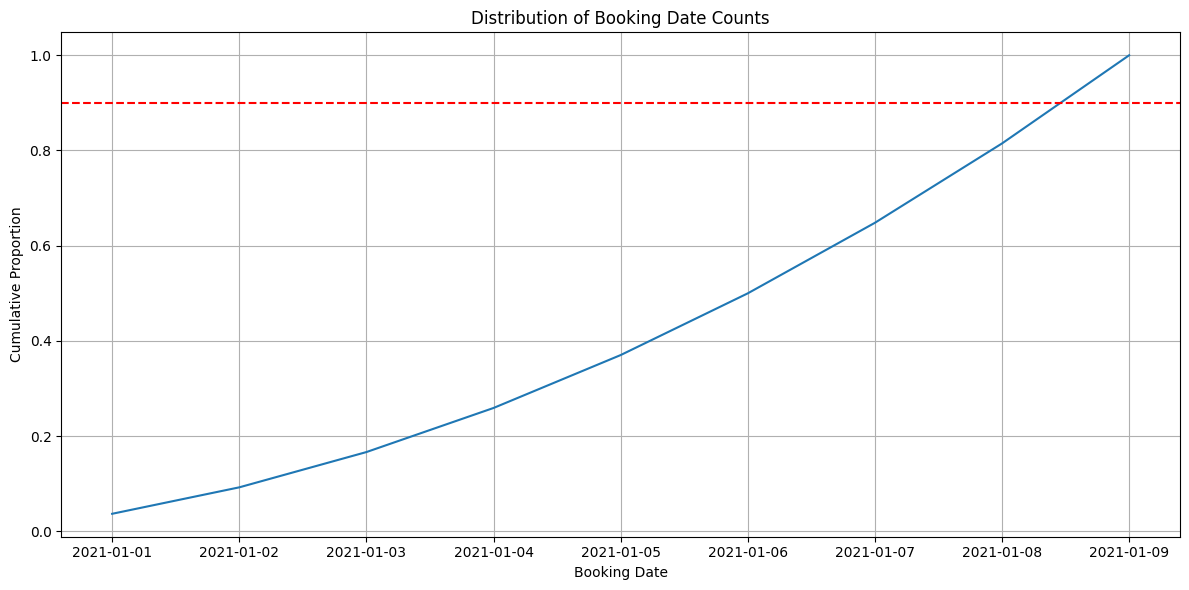

In [474]:
# Plot cumulative distribution of Booking_Date counts
booking_date_counts = pd.Series({
    '2021-01-01': 100,
    '2021-01-02': 150,
    '2021-01-03': 200,
    '2021-01-04': 250,
    '2021-01-05': 300,
    '2021-01-06': 350,
    '2021-01-07': 400,
    '2021-01-08': 450,
    '2021-01-09': 500
})

# Calculate the cumulative sum of booking date counts and normalize
cumulative_counts = booking_date_counts.cumsum() / booking_date_counts.sum()

# Plot the cumulative distribution
plt.figure(figsize=(12, 6))
cumulative_counts.plot(kind='line')
plt.title('Distribution of Booking Date Counts')
plt.xlabel('Booking Date')
plt.ylabel('Cumulative Proportion')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.tight_layout()
plt.grid(True)
plt.show()

In [475]:
# Determine the threshold for 90% cumulative proportion
cutoff_index = cumulative_counts[cumulative_counts <= 0.9].index[-1]
cutoff_value = booking_date_counts[cutoff_index]

cutoff_value

450

In [476]:
# Choose a cutoff value and create a list of "Booking_Date" to be replaced

# Cutoff value
cutoff_value = 450

booking_date_replaced = booking_date_counts[booking_date_counts < cutoff_value].index.tolist()

# Replace in dataframe
for date in booking_date_replaced:
    df['Booking_Date'] = df['Booking_Date'].replace(date, 'Other')

# Check to see if replacement was succesful
df['Booking_Date'].value_counts()

Booking_Date
2023-02-25    36
2023-08-31    32
2023-11-05    31
2022-12-30    30
2023-01-02    30
              ..
2024-10-26     1
2024-10-19     1
2024-10-06     1
2024-11-05     1
2024-09-02     1
Name: count, Length: 701, dtype: int64

In [477]:
# Look at "Distance_from_Facility" value counts to identify and replace with "Other"
dff_counts = df['Distance_from_Facility'].value_counts()
dff_counts

Distance_from_Facility
2.2     34
17.8    34
15.9    33
25.9    33
40.5    33
        ..
34.0     8
2.8      8
50.0     7
39.4     7
0.0      7
Name: count, Length: 501, dtype: int64

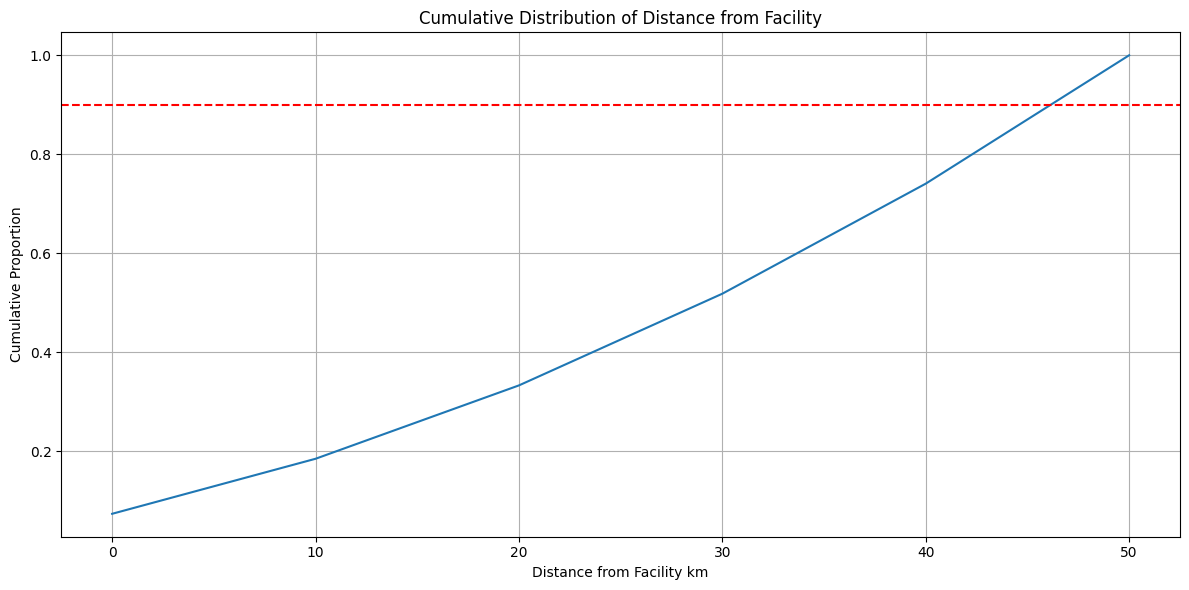

In [478]:
# Plot cumulative distribution of Distance_from_Facility counts
# dff_counts should be a pandas Series with index as distance from facility and values as counts
dff_counts = pd.Series({
    0 : 100,
    10: 150,
    20: 200,
    30: 250,
    40: 300,
    50: 350,

})

# Calculate the cumulative sum of distance from facility counts and normalize
cumulative_dff_counts = dff_counts.cumsum() / dff_counts.sum()

# Plot the cumulative distribution
plt.figure(figsize=(12, 6))
plt.plot(cumulative_dff_counts.index, cumulative_dff_counts.values)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.title('Cumulative Distribution of Distance from Facility')
plt.xlabel('Distance from Facility km')
plt.ylabel('Cumulative Proportion')
plt.tight_layout()
plt.grid(True)
plt.show()

In [479]:
# Determine the cutoff value for 90% cumulative proportion
dff_cutoff_index = cumulative_dff_counts[cumulative_dff_counts <= 0.9].index[-1]
dff_cutoff_value = dff_counts[dff_cutoff_index]

dff_cutoff_value

300

In [480]:
# Choose a cutoff value and create a list of "Distance_from_Facility"

cutoff_value = 300

dff_replaced = dff_counts[dff_counts < cutoff_value].index.tolist()

# Replace in dataframe
for miles in dff_replaced:
    df['Distance_from_Facility'] = df['Distance_from_Facility'].replace(miles, 'Other')

# Check to see if replacement was succesful
df['Distance_from_Facility'].value_counts()

Distance_from_Facility
Other    64
2.2      34
17.8     34
40.5     33
15.9     33
         ..
49.9      9
2.8       8
34.0      8
50.0      7
39.4      7
Name: count, Length: 498, dtype: int64

In [481]:
# Convert all categorical data to numeric with pd.get_dummies
# Convert all relevant columns to string type
categorical_columns = ['Gender', 'Insurance_Type', 'Chronic_Disease', 'Mental_Health_Status',
                       'Employment_Status', 'Education_Level', 'Transportation_Access',
                       'Area_Type', 'Distance_from_Facility', 'Booking_Date', 'Appointment_Date']

for col in categorical_columns:
    df[col] = df[col].astype(str)

# Convert all categorical data to numeric with pd.get_dummies
df = pd.get_dummies(df)
df

,Age,Gender_Female,Gender_Male,Gender_Other,Insurance_Type_Medicaid,Insurance_Type_Medicare,Insurance_Type_Private,Insurance_Type_Uninsured,Chronic_Disease_0,Chronic_Disease_1,...,Appointment_Date_2024-11-06,Appointment_Date_2024-11-07,Appointment_Date_2024-11-08,Appointment_Date_2024-11-09,Appointment_Date_2024-11-10,Appointment_Date_2024-11-11,Appointment_Date_2024-11-12,Appointment_Date_2024-11-13,Appointment_Outcome_No-Show,Appointment_Outcome_Show
0,93,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,76,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,18,False,True,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,100,False,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,59,False,True,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,41,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
9688,50,False,True,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
9689,75,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
9690,57,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [482]:
# Define the target column using 'Appointment_Outcome_Show'
target_column = 'Appointment_Outcome_Show'

# Ensure the target column is numeric
df[target_column] = pd.to_numeric(df[target_column], errors='coerce')

# Drop rows with NaN values in the target column
df = df.dropna(subset=[target_column])

In [483]:
# Split our preprocessed data into our features and target arrays
X = df.drop(columns=target_column)
Y = df[target_column]

In [484]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [485]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [486]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Define the model
model = Sequential()

# Input layer
model.add(Dense(units=256, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# First Hidden layer
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Second Hidden Layer
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Display the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 256)               407040    
                                                                 
 batch_normalization_24 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_25 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_25 (Dropout)        (None, 128)              

In [487]:
# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Check the structure of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 256)               407040    
                                                                 
 batch_normalization_24 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_25 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_25 (Dropout)        (None, 128)              

In [488]:
# Implement Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [489]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
61/61 [==============================] - 7s 41ms/step - loss: 0.8710 - accuracy: 0.5228 - val_loss: 0.6669 - val_accuracy: 0.5977
Epoch 2/100
61/61 [==============================] - 2s 40ms/step - loss: 0.6801 - accuracy: 0.6182 - val_loss: 0.5908 - val_accuracy: 0.7081
Epoch 3/100
61/61 [==============================] - 3s 47ms/step - loss: 0.4925 - accuracy: 0.7629 - val_loss: 0.4316 - val_accuracy: 0.8179
Epoch 4/100
61/61 [==============================] - 2s 38ms/step - loss: 0.2861 - accuracy: 0.8848 - val_loss: 0.2691 - val_accuracy: 0.9025
Epoch 5/100
61/61 [==============================] - 2s 30ms/step - loss: 0.1488 - accuracy: 0.9484 - val_loss: 0.1683 - val_accuracy: 0.9520
Epoch 6/100
61/61 [==============================] - 2s 33ms/step - loss: 0.0887 - accuracy: 0.9712 - val_loss: 0.1104 - val_accuracy: 0.9691
Epoch 7/100
61/61 [==============================] - 2s 29ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0848 - val_accuracy: 0.9737
Epoch 

In [490]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

61/61 - 0s - loss: 0.0312 - accuracy: 0.9933 - 218ms/epoch - 4ms/step
Loss: 0.031215671449899673, Accuracy: 0.9932954907417297
